# World Happiness Report

he World Happiness Report is a landmark survey of the state of global happiness. The first report was published in 2012, the second in 2013, the third in 2015, and the fourth in the 2016 Update. The World Happiness 2017, which ranks 155 countries by their happiness levels, was released at the United Nations at an event celebrating International Day of Happiness on March 20th. The report continues to gain global recognition as governments, organizations and civil society increasingly use happiness indicators to inform their policy-making decisions. Leading experts across fields – economics, psychology, survey analysis, national statistics, health, public policy and more – describe how measurements of well-being can be used effectively to assess the progress of nations. The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness.

What is Dystopia?

Dystopia is an imaginary country that has the world’s least-happy people. The purpose in establishing Dystopia is to have a benchmark against which all countries can be favorably compared (no country performs more poorly than Dystopia) in terms of each of the six key variables, thus allowing each sub-bar to be of positive width. The lowest scores observed for the six key variables, therefore, characterize Dystopia. Since life would be very unpleasant in a country with the world’s lowest incomes, lowest life expectancy, lowest generosity, most corruption, least freedom and least social support, it is referred to as “Dystopia,” in contrast to Utopia

What are the residuals?

The residuals, or unexplained components, differ for each country, reflecting the extent to which the six variables either over- or under-explain average life evaluations. These residuals have an average value of approximately zero over the whole set of countries. 

What do the columns succeeding the Happiness Score(like Family, Generosity, etc.) describe?

The following columns: GDP per Capita, Family, Life Expectancy, Freedom, Generosity, Trust Government Corruption describe the extent to which these factors contribute in evaluating the happiness in each country.
The Dystopia Residual metric actually is the Dystopia Happiness Score(1.85) + the Residual value or the unexplained value for each country.

The Dystopia Residual is already provided in the dataset. 

If you add all these factors up, you get the happiness score so it might be un-reliable to model them to predict Happiness Scores.

You need to predict the happiness score considering all the other factors mentioned in the dataset. 

In [1]:
#importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Happiness.csv')

In [3]:
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [4]:
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [5]:
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [6]:
df.tail()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302
157,Togo,Sub-Saharan Africa,158,2.839,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726


In [7]:
df.sample()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
36,Malta,Western Europe,37,6.302,0.04206,1.2074,1.30203,0.88721,0.60365,0.13586,0.51752,1.6488


In [8]:
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [9]:
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [10]:
 df['Region'].value_counts()

Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
North America                       2
Australia and New Zealand           2
Name: Region, dtype: int64

<AxesSubplot:xlabel='Standard Error', ylabel='Dystopia Residual'>

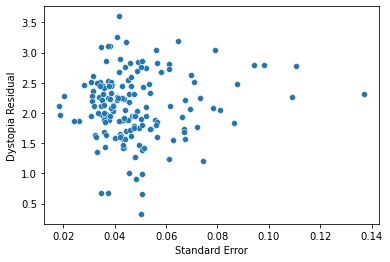

In [11]:
sns.scatterplot(x='Standard Error',y='Dystopia Residual',data=df)

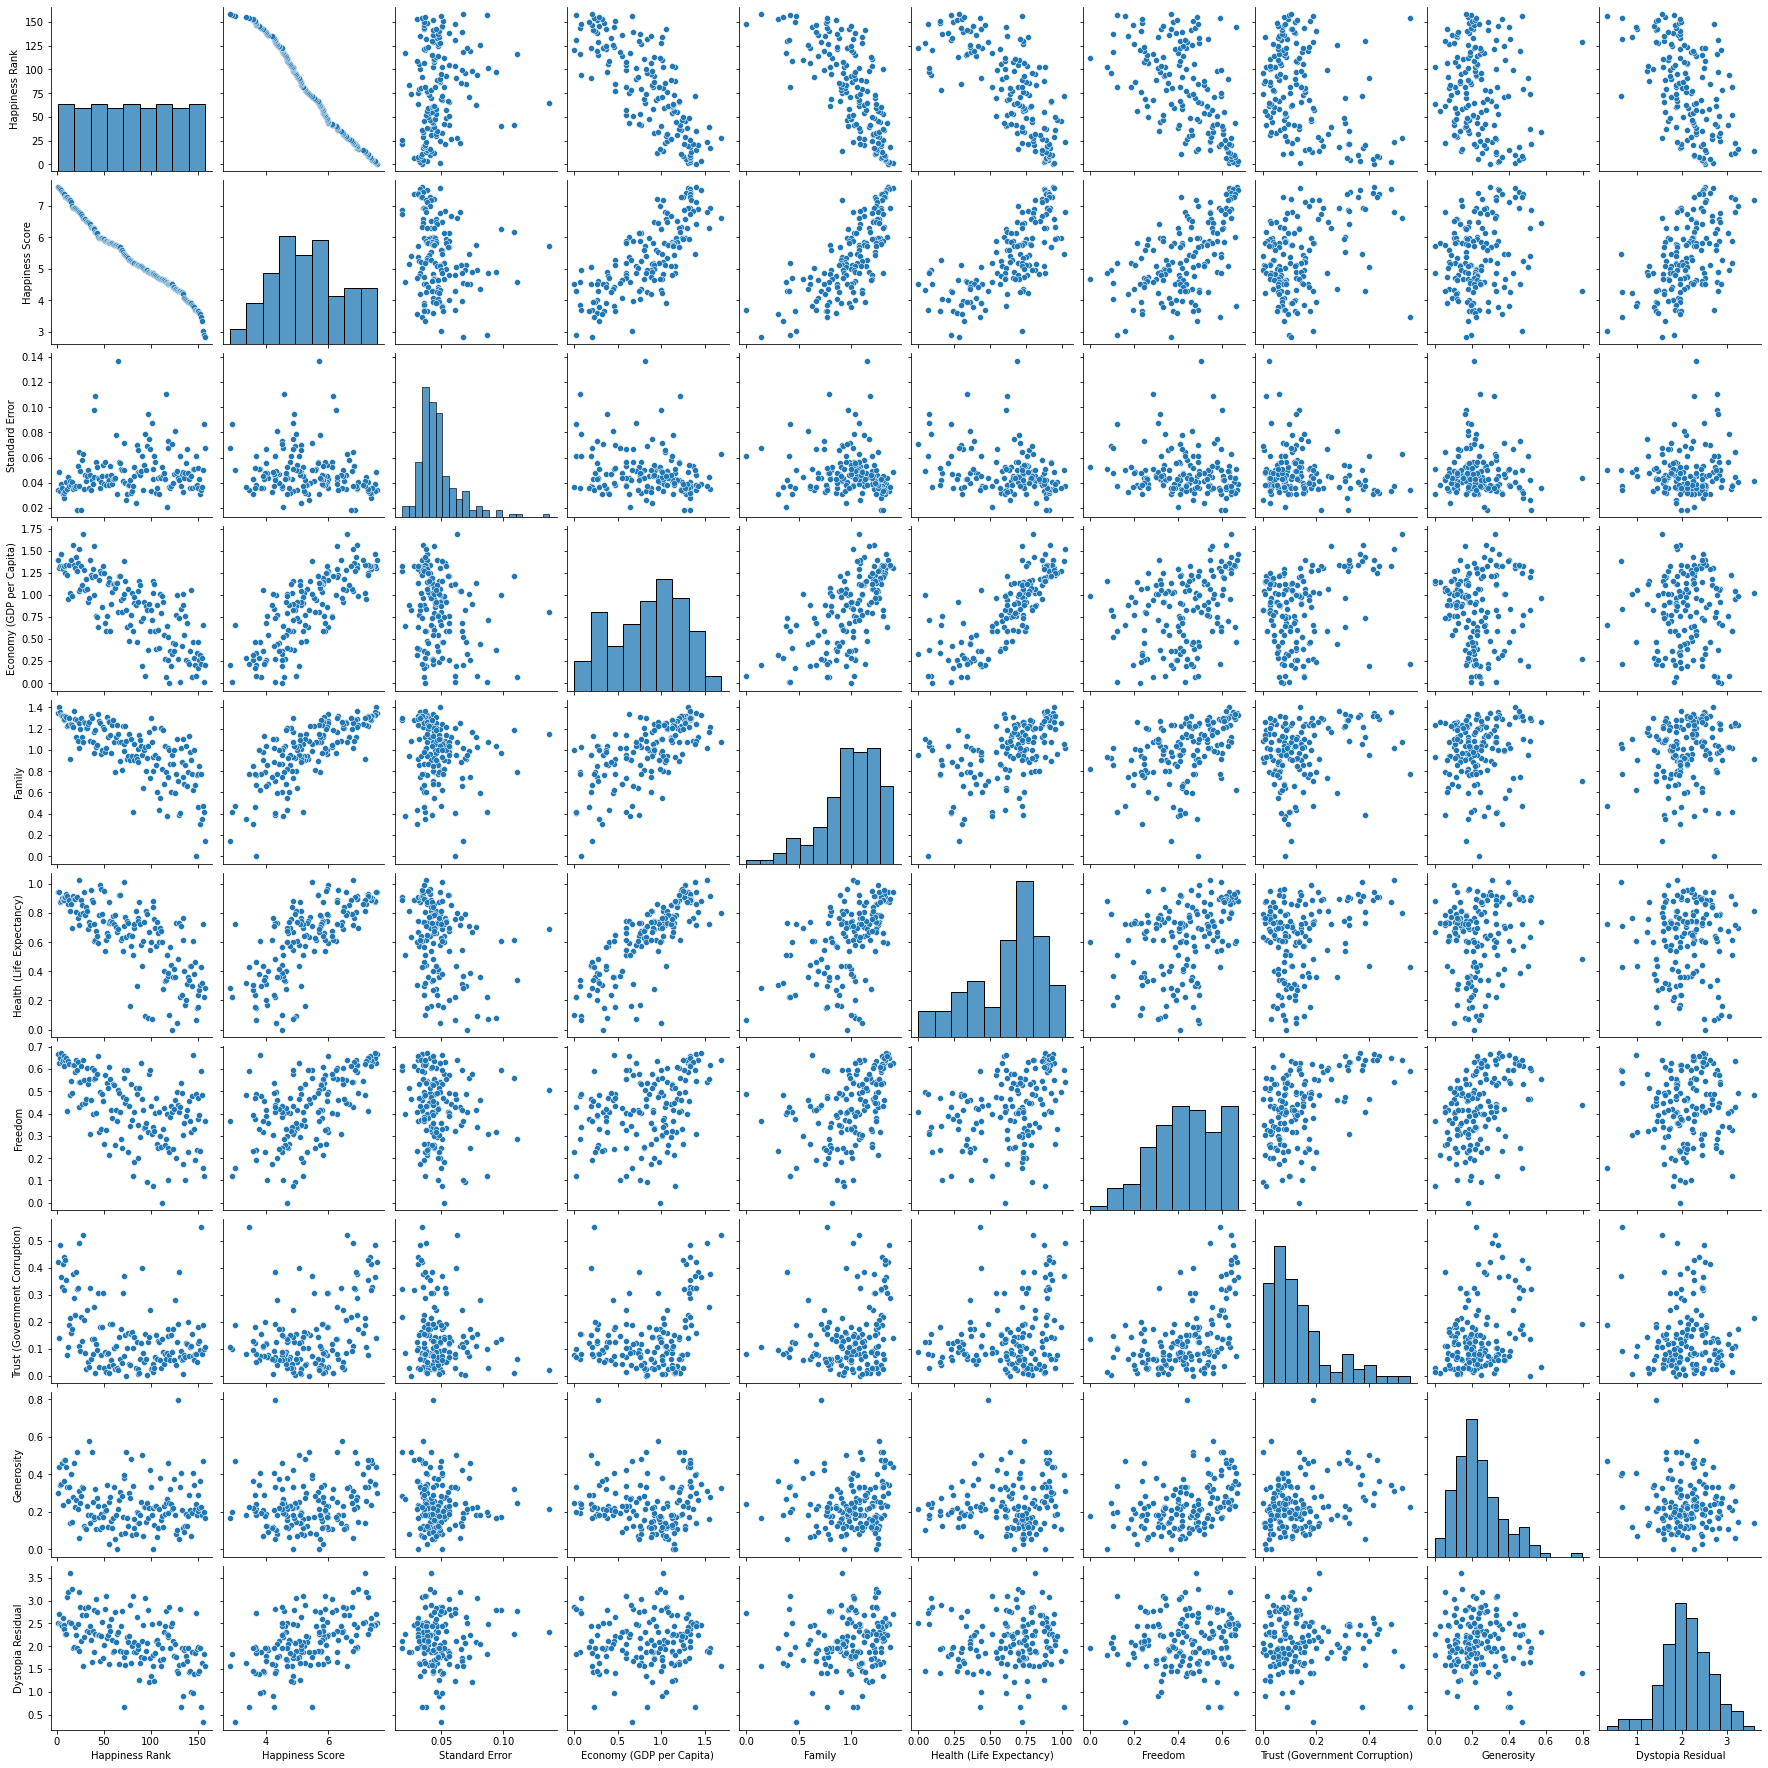

In [12]:
sns.pairplot(df)
plt.show()

In [13]:
df.corr()#correlation between columns

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Rank,1.000000,-0.992105,0.158516,-0.785267,-0.733644,-0.735613,-0.556886,-0.372315,-0.160142,-0.521999
Happiness Score,-0.992105,1.000000,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
Standard Error,0.158516,-0.177254,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981
Economy (GDP per Capita),-0.785267,0.780966,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,-0.733644,0.740605,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health (Life Expectancy),-0.735613,0.724200,-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,-0.556886,0.568211,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust (Government Corruption),-0.372315,0.395199,-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105
Generosity,-0.160142,0.180319,-0.088439,-0.010465,0.087513,0.108335,0.373916,0.276123,1.000000,-0.101301
Dystopia Residual,-0.521999,0.530474,0.083981,0.040059,0.148117,0.018979,0.062783,-0.033105,-0.101301,1.000000


<AxesSubplot:>

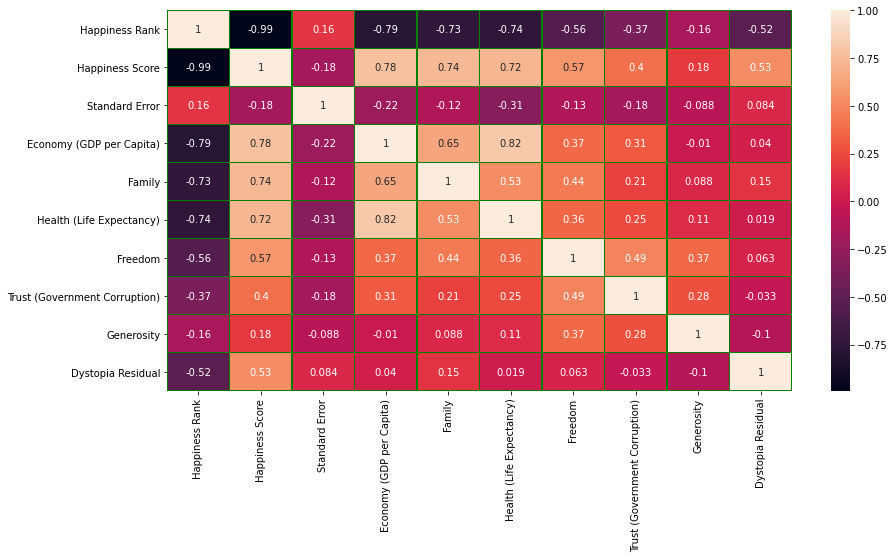

In [14]:
plt.figure(figsize=(14,7))
sns.heatmap(data=df.corr(),annot=True,linewidths=0.5,linecolor='green')

In [15]:
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

# Checking Outlier

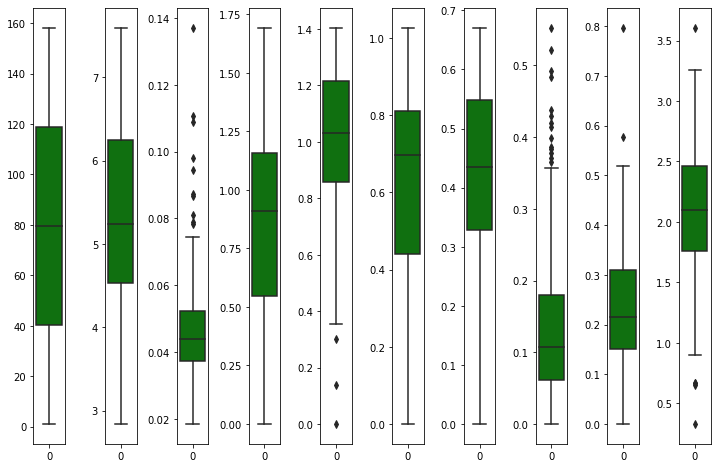

In [17]:
df1=df.drop(['Region'],axis=1)
collst=df1.drop('Country',axis=1).columns.values
ncol=30
nrows=14
plt.figure(figsize=(ncol,3*ncol))
for i in range(len(collst)):
    plt.subplot(nrows,ncol,1+i)
    sns.boxplot(data=df[collst[i]],color='green',orient='v')
    plt.tight_layout()

In [18]:
df.skew()

Happiness Rank                   0.000418
Happiness Score                  0.097769
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

In [19]:
df.corr()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Rank,1.000000,-0.992105,0.158516,-0.785267,-0.733644,-0.735613,-0.556886,-0.372315,-0.160142,-0.521999
Happiness Score,-0.992105,1.000000,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
Standard Error,0.158516,-0.177254,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981
Economy (GDP per Capita),-0.785267,0.780966,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,-0.733644,0.740605,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health (Life Expectancy),-0.735613,0.724200,-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,-0.556886,0.568211,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust (Government Corruption),-0.372315,0.395199,-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105
Generosity,-0.160142,0.180319,-0.088439,-0.010465,0.087513,0.108335,0.373916,0.276123,1.000000,-0.101301
Dystopia Residual,-0.521999,0.530474,0.083981,0.040059,0.148117,0.018979,0.062783,-0.033105,-0.101301,1.000000


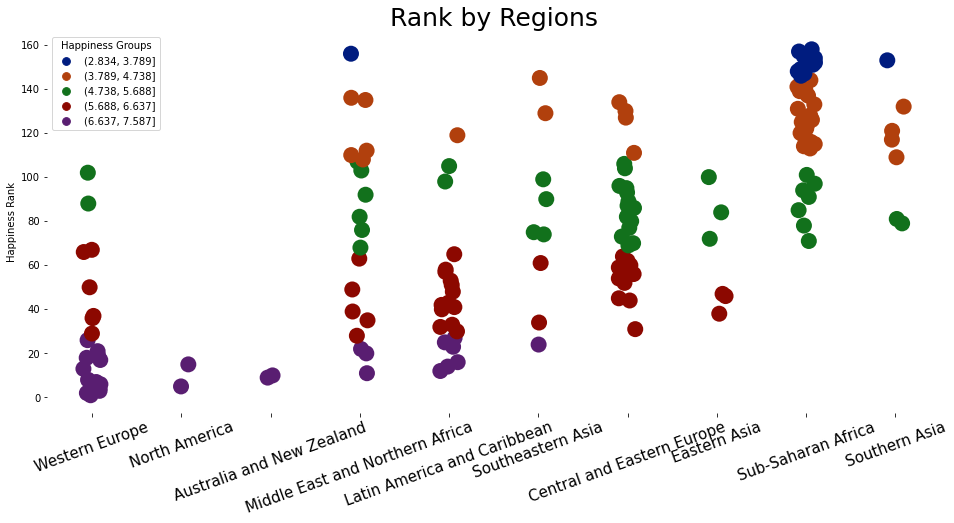

In [20]:
df['Happiness Groups']=pd.cut(df['Happiness Score'],5)
f,ax = plt.subplots(1,1,figsize=(16,7))
sp = sns.stripplot(x="Region", y="Happiness Rank", data=df, jitter=True,palette='dark',size=16,hue='Happiness Groups')
plt.xticks(rotation=20,fontsize=15);
plt.xlabel('');
sp.set_title('Rank by Regions',fontsize=25);
sns.despine(left=True,bottom=True);

# Correlation for Europe

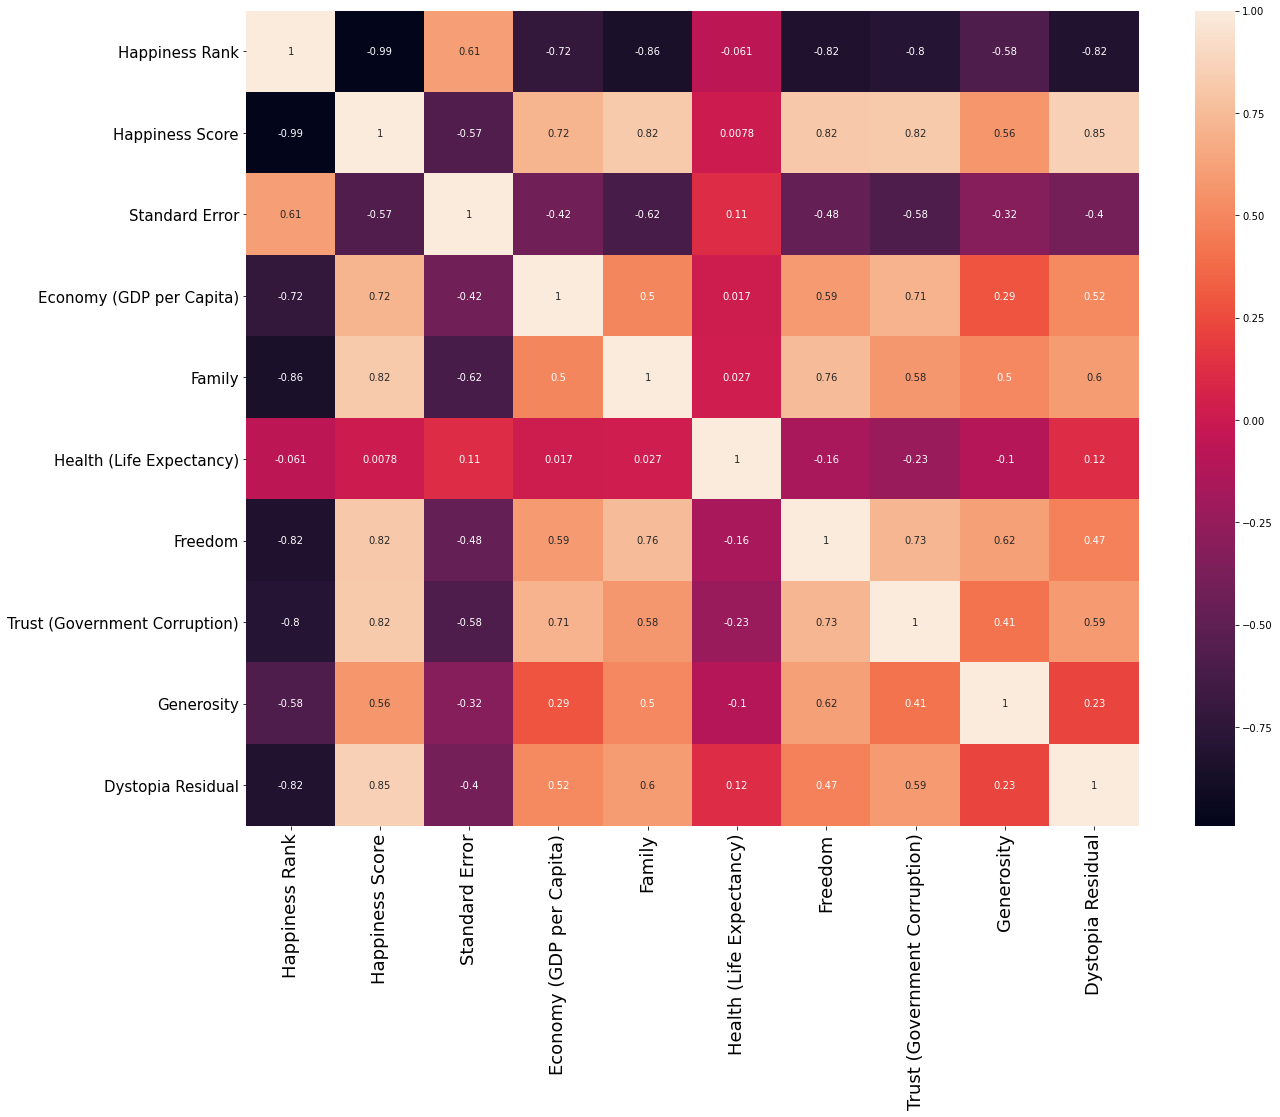

In [21]:
plt.rcParams['figure.figsize'] = (20, 15)
d = df.loc[lambda df: df['Region'] == 'Western Europe']
sns.heatmap(d.corr(), annot = True)
plt.xticks(fontsize=18)
plt.yticks(fontsize=15)
plt.show()

The Heat Map particularly for Europe has one more thing to add apart from Family Satisfaction, Freedom, Economy, Generosity, It is also highly correlated with Trust in Government.


# North America

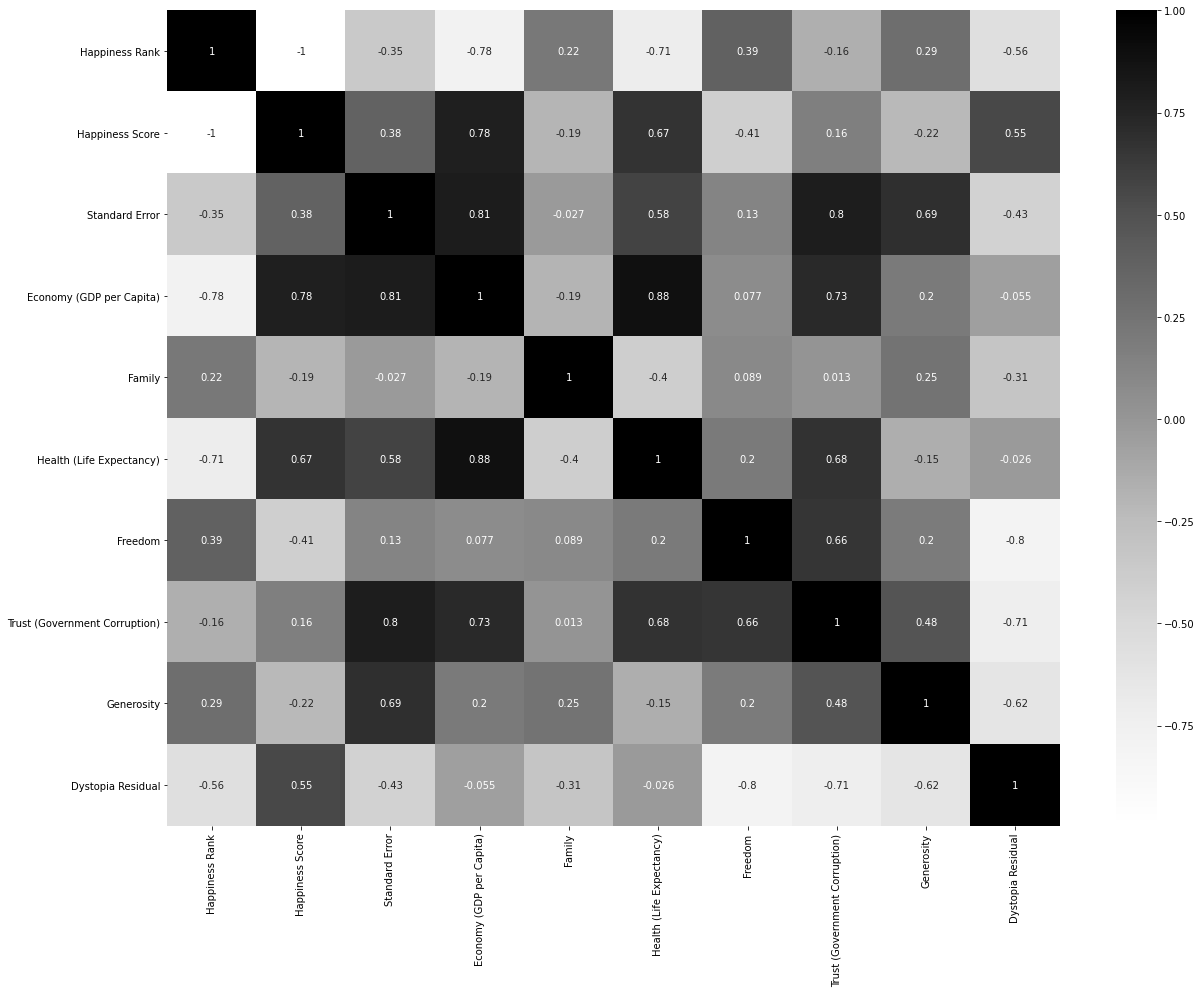

In [22]:
plt.rcParams['figure.figsize'] = (20, 15)
d = df[lambda df:df['Region'] == 'Eastern Asia']
sns.heatmap(d.corr(), cmap = 'Greys', annot = True)
plt.show()

 The Correlation is negative for many important factors such as Economy, Health, Trust in Government which makes the situation very critical. It has Positive correlations only with Freedom, Generosity and Famlily Satisfaction.

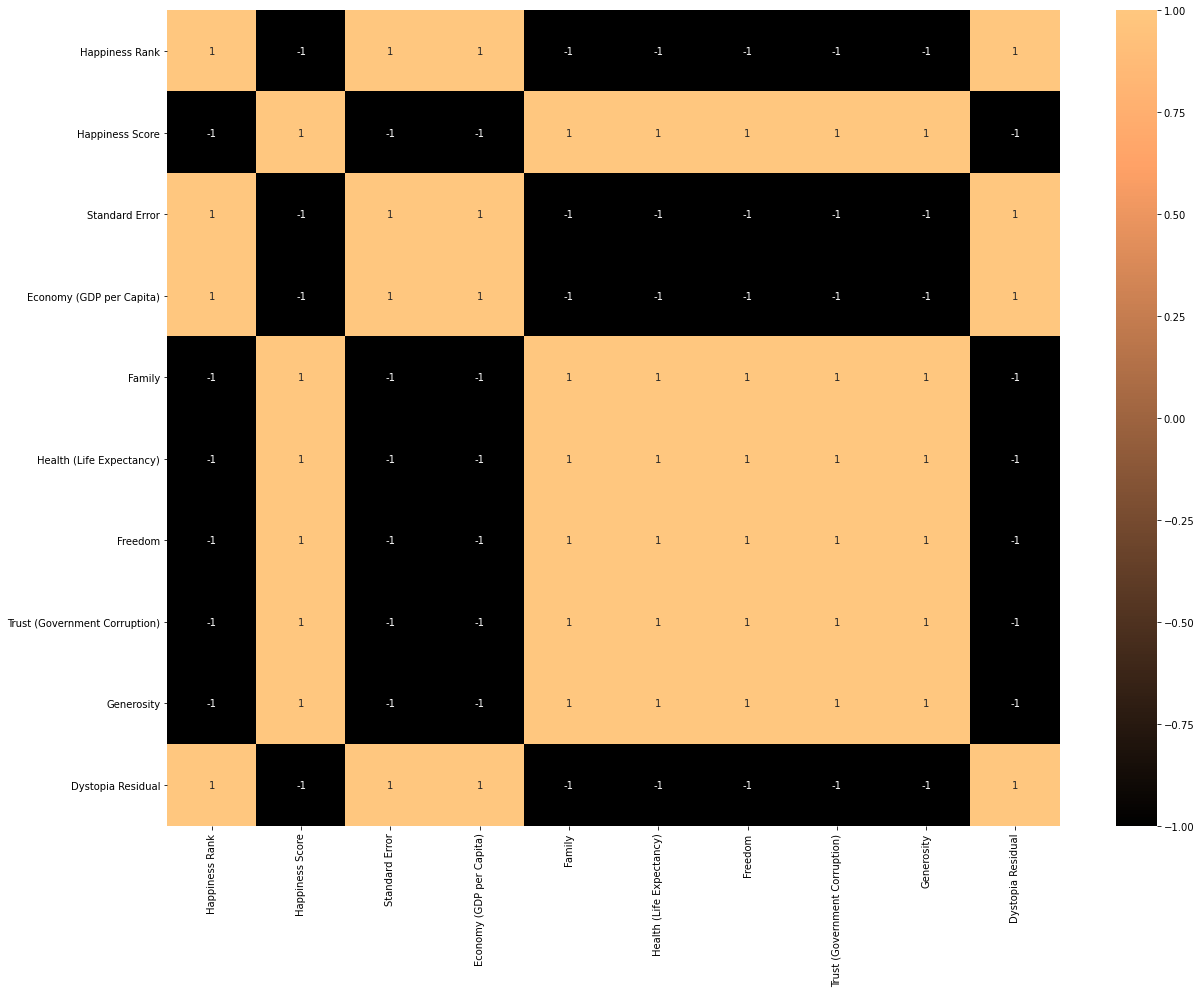

In [23]:
plt.rcParams['figure.figsize'] = (20, 15)
d = df[lambda df: df['Region'] == 'North America']
sns.heatmap(d.corr(), cmap = 'copper', annot = True)
plt.show()

Everything is highly correlated to the Happiness in America. Amongst so many countries of the world. Being a very large country also America is still able to keep their people happy. America stands at position number 10 amongst the Happiness Rankings for the World.

# Middle East and Northern Africa

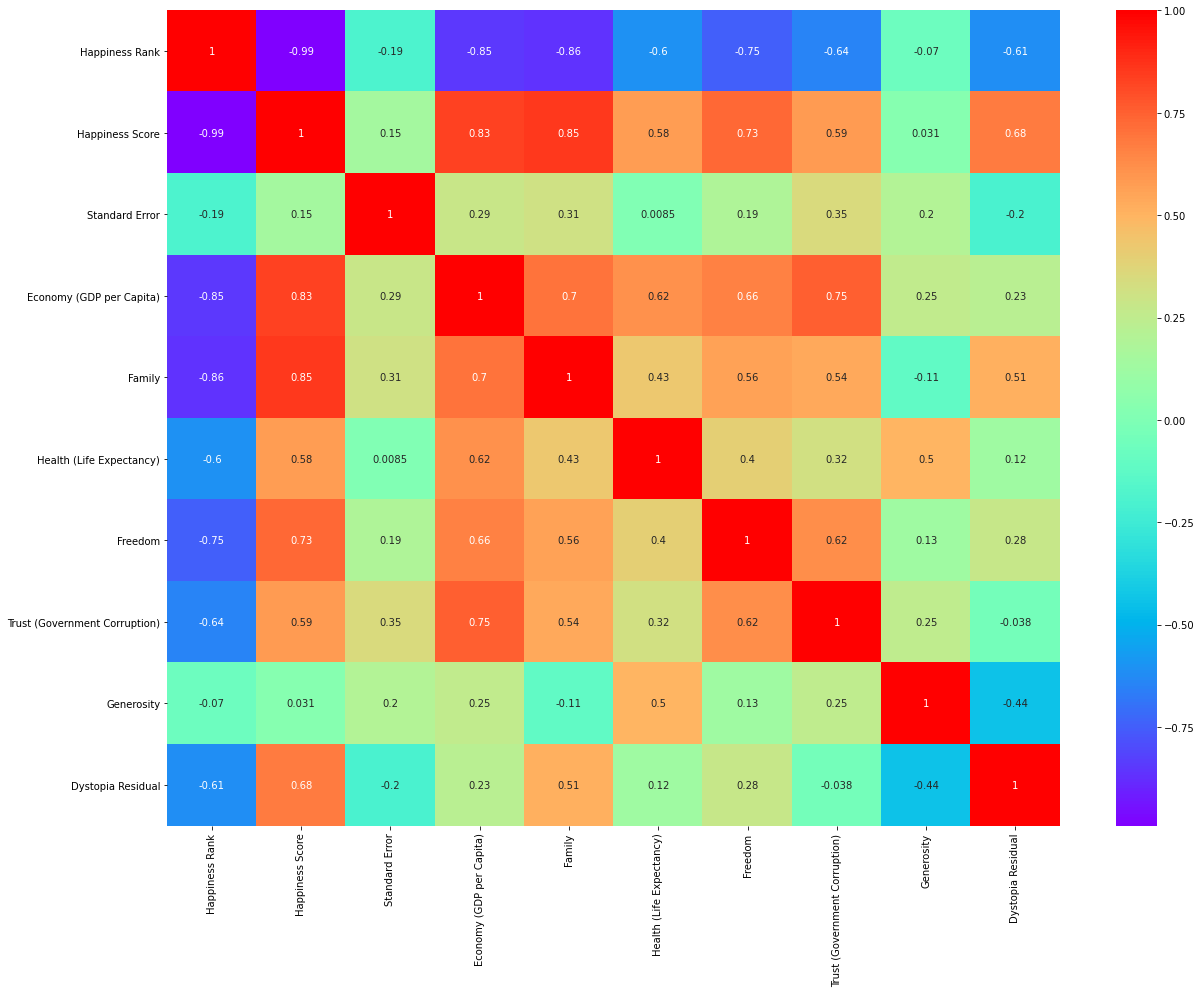

In [24]:
plt.rcParams['figure.figsize'] = (20, 15)
d = df[lambda df:df['Region'] == 'Middle East and Northern Africa']
sns.heatmap(d.corr(), cmap = 'rainbow', annot = True)
plt.show()

The correlations are quite good with almost all the important factors being highly correlated with Happiness. Family Satisfaction is the most important factor as it is the most important factor for happiness in this region.

# Sub-Saharan Africa

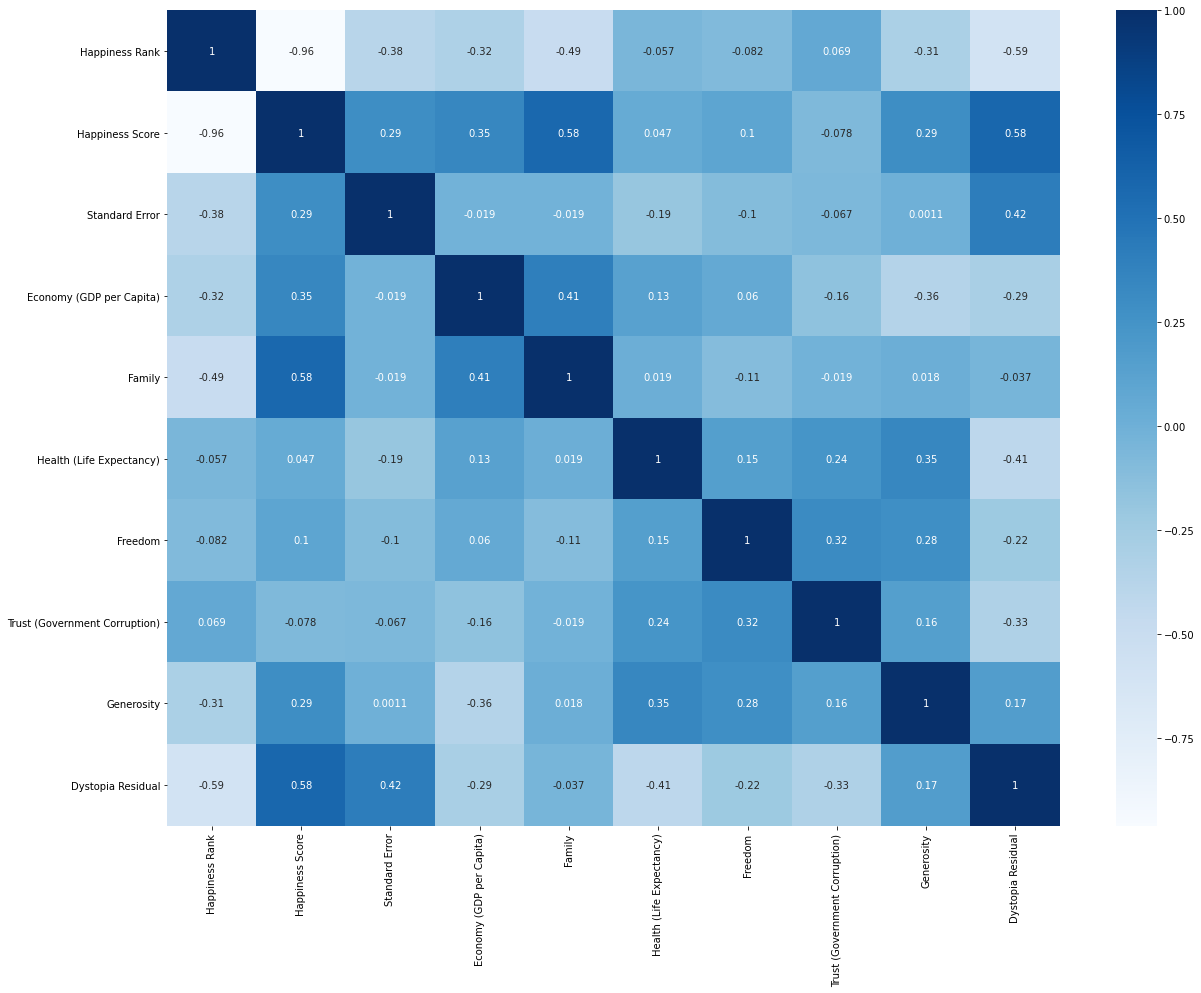

In [25]:
plt.rcParams['figure.figsize'] = (20, 15)
d = df[lambda df: df['Region'] == 'Sub-Saharan Africa']
sns.heatmap(d.corr(), cmap = 'Blues', annot = True)
plt.show()

The Situations are very bad for Sub-Saharan Region as it is the unhappiest region in the world. The correlations with Happiness Score are very low for features such as Generosity, Family Satisfaction, Freedom etc. Almost all of the features are having less than 0.5 correlation which is very bad.

# Top 10 Most Generous Countries

In [26]:
df[['Country', 'Generosity']].sort_values(by = 'Generosity',ascending = False).head(10)

,Country,Generosity
128,Myanmar,0.79588
33,Thailand,0.57630
20,United Kingdom,0.51912
36,Malta,0.51752
73,Indonesia,0.51535
90,Somaliland region,0.50318
78,Bhutan,0.47998
6,Netherlands,0.47610
8,New Zealand,0.47501
155,Syria,0.47179


# Top 10 Countries with Trust in Government

In [27]:
df[['Country', 'Trust (Government Corruption)']].sort_values(by = 'Trust (Government Corruption)',ascending = False).head(10)

,Country,Trust (Government Corruption)
153,Rwanda,0.55191
27,Qatar,0.52208
23,Singapore,0.49210
2,Denmark,0.48357
7,Sweden,0.43844
8,New Zealand,0.42922
0,Switzerland,0.41978
5,Finland,0.41372
90,Somaliland region,0.39928
19,United Arab Emirates,0.38583


Looks like there is no trust in government all round the world, except Norway, sweden, and Finland.

Canada Saudi Arabia, Germany, United Kingdom, Somalia, Ireland, and Austrlia are also having good trust in the Governance of their Countries

# Top 10 Countries in Family Satisfaction

In [28]:
df[['Country', 'Family']].sort_values(by = 'Family', ascending = False).head(10)

,Country,Family
1,Iceland,1.40223
17,Ireland,1.36948
2,Denmark,1.36058
0,Switzerland,1.34951
43,Uzbekistan,1.34043
3,Norway,1.33095
4,Canada,1.32261
8,New Zealand,1.31967
5,Finland,1.31826
35,Spain,1.31379


India and China have very low Family Satisfaction comparatively.

All over the world Family Satisfaction rate is really good.

Central African Republic has the lowest Family Satisfaction score in the w

# Top 10 Countries with Best Economy

In [29]:
df[['Country', 'Economy (GDP per Capita)']].sort_values(by = 'Economy (GDP per Capita)',ascending = False).head(10)

,Country,Economy (GDP per Capita)
27,Qatar,1.69042
16,Luxembourg,1.56391
38,Kuwait,1.55422
23,Singapore,1.52186
3,Norway,1.45900
19,United Arab Emirates,1.42727
0,Switzerland,1.39651
34,Saudi Arabia,1.39541
14,United States,1.39451
71,Hong Kong,1.38604


America, Canada, Austrelia, Saudi Arabia, European Countries are the Leaders in the Economy and GDP.

Smaller Countries like Norway, Qatar, Luxembourg are having the best GDP rate in the world.

Most of the African Countries are having very low GDP rate.

India, Pakistan, Myanmar are having very low GDP in the Asian Regions

# Top 10 Most Freedom Oriented Countries

In [30]:
df[['Country', 'Freedom']].sort_values(by = 'Freedom', ascending = False).head(10)

,Country,Freedom
3,Norway,0.66973
0,Switzerland,0.66557
144,Cambodia,0.66246
7,Sweden,0.65980
43,Uzbekistan,0.65821
9,Australia,0.65124
2,Denmark,0.64938
5,Finland,0.64169
19,United Arab Emirates,0.64157
27,Qatar,0.64040


Looks like Canada, Australia and Europe are the best places on Earth to live. They have high scores throughout. In this case also They are the Winners.

# Top 10 Happiest Countries

In [31]:
df[['Country','Happiness Rank']].head(10)

,Country,Happiness Rank
0,Switzerland,1
1,Iceland,2
2,Denmark,3
3,Norway,4
4,Canada,5
5,Finland,6
6,Netherlands,7
7,Sweden,8
8,New Zealand,9
9,Australia,10
